In [1]:
library(lattice)

In [2]:
a <-read.csv("donation.csv", header=TRUE, sep=",")

Question 1:

In [3]:
# Calculate for the total donation for each alumni
a$TGiving=a$FY04Giving+a$FY03Giving+a$FY02Giving+a$FY01Giving+a$FY00Giving

In [4]:
# First we look at the statistics and the distribution graph of the sample to see if it's close to a normal distribution
library(lattice)
summary(a$TGiving)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0      75     980     400  171870 

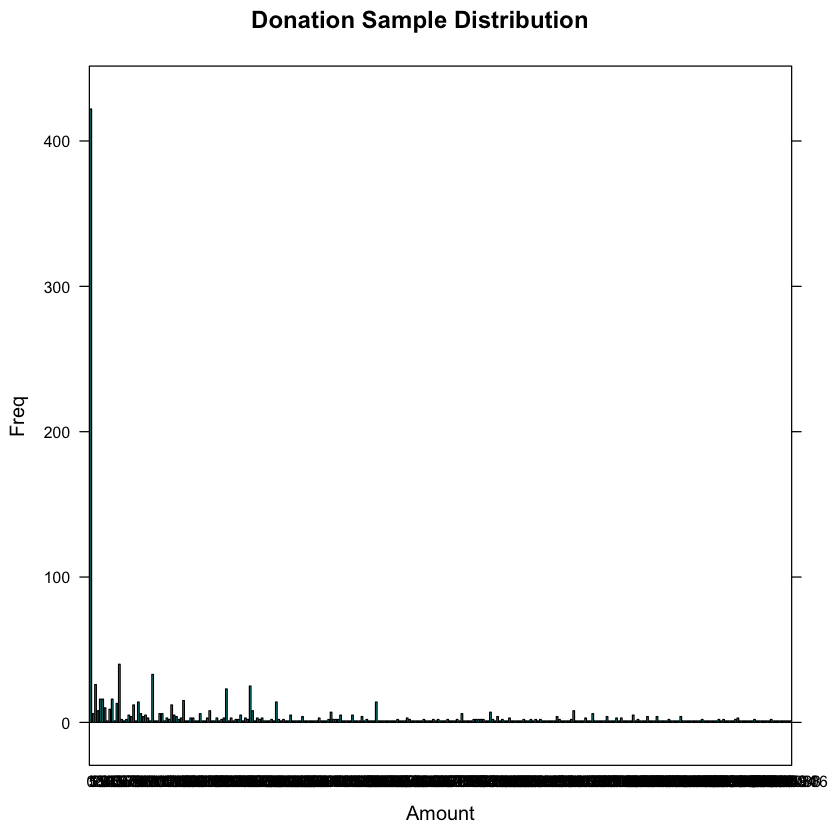

In [5]:
barchart(table(a$TGiving),horizontal=F,main="Donation Sample Distribution",xlab="Amount")

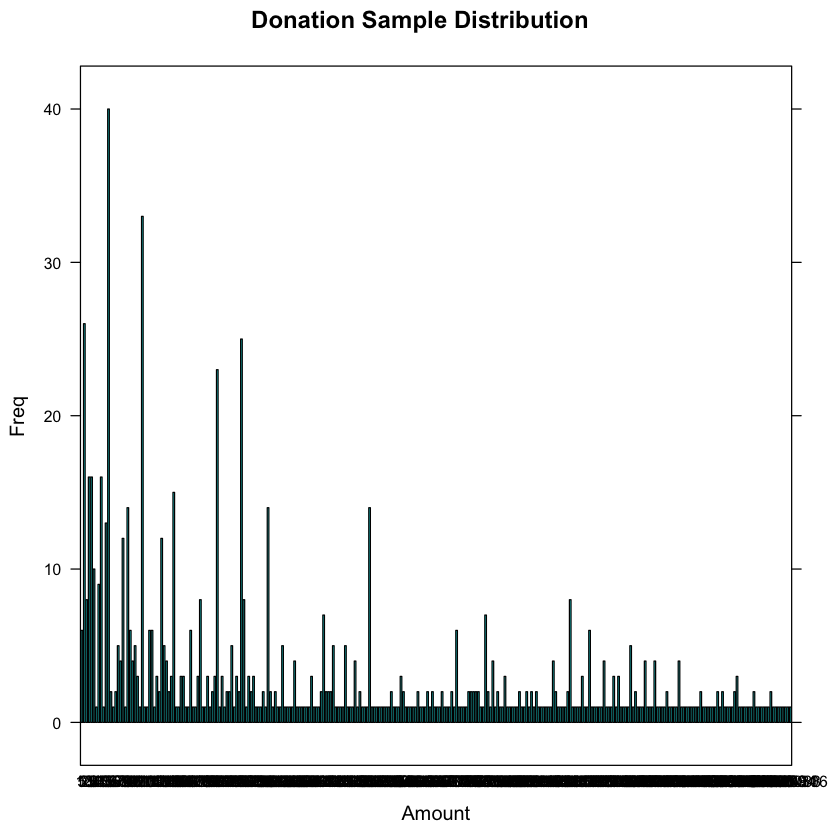

In [7]:
# It donesn't seem too convincing for me, since the mean 980 is much larger than median 75, the sample is a right skewed distribution.
# I try to exclude donation=0 and have a better look at the graph:
barchart(table(a$TGiving[a$TGiving>0]),horizontal=F,main="Donation Sample Distribution",xlab="Amount")

In [8]:
# Well...let's assume that the donation distribution is near normal distribution.

In [9]:
# the mean 
mean=mean(a$TGiving)

In [10]:
print(mean)

[1] 980.0436


In [11]:
# the number of total alumus
numa=nrow(a) 

In [12]:
print(numa)

[1] 1230


*since we are using sample standard deviation to estimate population standard deviation, even though the sample size is decent, we still use T distribution for more accurate result.

In [13]:
# with 95% confidence, we may know a/2=(1-95%)/2=2.5%, so one tail of the distribution should be 2.5%. 
t=qt(0.975,numa-1) 

In [14]:
# below we calculate the 95% confident interval
CIta=mean+c(-1,1)*t*sd(a$TGiving)/sqrt(numa)

In [15]:
print(CIta)

[1]  606.8797 1353.2074


Question 1: We are 95% confident that the true mean donation is between 606.8797 and 1353.2074 USD, although the true mean may or may not be in this interval, 95% of the intervals formed in this manner from all samples will contain the true mean. 

Question 2:

In [16]:
# calculate the number of alumus who donate at least 1000usd
b=a[a$TGiving>=1000,]

In [17]:
numb=nrow(b) 

In [18]:
# the poportion of the alumus donated at least 1000usd
p=numb/numa

In [19]:
z=qnorm(0.975)

In [20]:
# calculate the confident interval for the above poportion
CIp=p+c(-1,1)*z*sqrt(p*(1-p)/1230)

In [21]:
print(CIp)

[1] 0.09304368 0.12809453


Question 2: We are 95% confident that the true percentage of alumni who donate equal or more than 1000 USD in the population is between 9.30% and 12.81%. 

Question 3:

In [22]:
# assign sampling error 100 to "e"
e=100

In [23]:
# assign the required sample size to N1
N1=z^2*(sd(a$TGiving))^2/e^2

In [24]:
print(N1)

[1] 17094.19


In [25]:
#Original sample size
print(numa)

[1] 1230


In [26]:
#Let's see the original Sampling error
print(c(-1,1)*t*sd(a$TGiving)/sqrt(numa))

[1] -373.1639  373.1639


In [27]:
ratio=N1/numa
print(ratio)

[1] 13.89771


Question 3: The minimum number of sample size is 17095 with sampling error maximized to 100 on mean total contribution with 95% confidence. With the sampling error decrese to 100 from 373.16 of the original sample, the sample size raise from 1230 to 17095, which is almost 14 times of the original sample size.
